# GA Sample Teach: Decision Tree - Course Note

## Objective

*Jamie is a marketing manager who would like to transition to become a Data Scienist. Jamie's currently salary is $75k USD, and he would like to know how much he should expect to make as a Data Scientist in US and Canada.*

By the end of the lession, you will be able to create a regression decision tree model to help Jamie with his question. To doing so, you will:
1. [x] **Be able to explain how regression decision tree works to an non-technical audience**
2. [x] **Know how to use sklearn package to fit decision tree for regression**

Note, <font color=blue> *we will focus on contents written in blue in class*. </font> However, you are expected to read and understand the entire document on your own.

For this course, please download the *latest anaconda version*. You would also need to install *graphviz package*. Please contact your instructor if you need help with setup.

## 1. What is a regression decision tree and how does it work?

#### What is it?

- <font color=blue>Regression decision tree is an ***algorithm*** that estimates the ***conditional expected value*** of a ***response***, given a set of ***features***.</font>

#### How does it work?

- <font color=blue>Using the "if... then... else" logic, the decision tree splits the data according a set of conditions and calculate the expected value within each split or ***node***.</font>


#### Key terms:

- ***Algorithm***: *An automated way to return an output given a set of inputs and parameters.*
- ***Conditional expected value***: *the expected value (response) given a certain set of features.*
- ***Response***: *The output of a model, generally it is the value that you are interested in predicting.*
- ***Features***: *A set of conditions or events that may change the output or response.*
- ***Node*** : *Decision tree model is often visuallized using a tree diagram, where each node represents the expected value following a split.*

### Let's do following exercise to clarify this concept and see how it works

#### Problem: How much should I expect to make as a Data Scientist?

To help Jamie, we will use survey data provided by kaggle, see below for a brief description. You can view the raw data by opening KaggleDSSurvey_GA.csv from the course zip file.

    This data contains individuals salary information for 3362 data scientist, along with other info about the responders such as: Gender, education, country of employement, working tenure etc.

#### Approach: a) Calculate the average salary reported by all respondents

<font color=blue> One way to answer Jamie is by averaging the salary of all respondents. Let's walk through how we would do this. </font>

In [3]:
#Load package and data
import numpy as np
import pandas as pd
df_survey = pd.read_csv('KaggleDSSurvey_GA.csv')

#Calculate average salary
N_resp = df_survey.shape[0] #Return the number of respondents
EV_Salary = df_survey['CompensationUSD'].mean(axis=0) #Return the average salary or expected value

print('The average salary reporeted by {} respondents is ${:,.2f}'.format(N_resp,EV_Salary))

The average salary reporeted by 3362 respondents is $78,652.10


#### Approach: b) Using tree algoirthm to quantify the average salary for a given set of features

We see that the average salary is approximately $79k USD. However, does this apply to Jamie? Considering this:
- Jamie will likely start off at an entry level, with <3 year experience
- But, Jamie is an experienced manager, he has a MSc in engineering and he is a dual US/Can citizen

<font color=blue>In other words, given Jamie's unique situation, what is Jamie's **conditional expected value**?</font>

To answer this question, we could manually segment the data. However doing so is time consuming, since we have 9 **features** attached to each member.

    Say if you want to choose only 2 variables out of 9 (9c2), that would be 36 combinations, and 9n3 would be 84.

<font color=blue>This is where **algorithm** comes in handy. In fact, we can use a regression tree package provided by sklearn to do this very fast. Let's do it together next.</font>

In [4]:
#Split data so that response (salary) and features are stored in y and x variables.
y = df_survey['CompensationUSD']
x = pd.get_dummies(df_survey.drop('CompensationUSD', axis=1))

#Fitting the regression tree
from sklearn import tree
reg_fit = tree.DecisionTreeRegressor(min_samples_leaf=0.05) #here, we need to specify the min number of samples to terminate a leaf. Play around with this number and see what happens
reg_fit.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.05, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#### So how does it actually work?

Using the survey data, the Tree algorithm automatically search for ways to branch the data into groups or nodes. The goal here is to create nodes with maximum difference in conditional expected salary.

    The algoirthm identified the best split that produces the biggest difference. It then continious branching down to get more and more granular. Finally, the search stops when the samples are either small enough, or there is no difference between the nodes.

Note that the min_sample_leaf variable specify the stop criteria. Setting it at 0.05 means that the split terminates when the sample size within each node < 5% of the total. We will learn more about this in later classes.


#### Intrepretation: US Data Scientists get paid a preimum, while management skills becomes an asset with tenure.
    
<font color=blue>Let's take a look at the result provided by our regression tree - please open **TreeGraph.svg** from the course zip file and follow along.</font>


Three key take aways: 
- **Location** (the first split) is the biggest determinant of your expected salary as a data scienist

        $110k US vs $59k non-US

- Regardless of where the job is, the second split depends on your **tenure** or experience and followed by your ability to **influence**.

        For US, $150k with >10 yrs experience vs $104k with < 10 yrs experience
        For non-US, $89k with >10 yrs experience vs $52k with < 10 yrs experience
        For non-US, $91k  for those with > yrs experience and in position to influence

- Lastly, we see that **learning style** have a marginal impact but only at the start when your tenure is < 3 years.

        $58k for learners using multiple sources vs $51k for learners using only one source
        

        


### <font color=red>2. Let's test your skills with sklearn</font>

#### <font color=red> Problem: Determine the expected salary for Data Scientists in Canada </font>

- <font color=red>You can download the dataset here: [LINK] </font>

In [5]:
#Load data and library
#Load package and data
import numpy as np
import pandas as pd

df_survey = pd.read_csv('C:/Users/Robert/Documents/CS Documents/GA_SampleTeach/KaggleDSSurveyCAN_GA.csv')

In [ ]:
#####PRACTICE########
#A) Import sklearn package

    #from sklearn import tree

#B) Split df_survey to store features in variable x, and response with variable y

    #y = df_survey['CompensationUSD']
    #x = pd.get_dummies(df_survey.drop('CompensationUSD', axis=1))


#C) Fit y and x using the sklearn tree algorithm package, save the model object as reg_fit

    #reg_fit = tree.DecisionTreeRegressor(min_samples_leaf=0.05)
    #reg_fit.fit(x,y)

<font color=red> Once finished run the script below to validate, and visualize your work </font>

Excellent! You know know the basics to fitting a decision tree.
Now, you can open up the image saved on your local hard drive to view the results


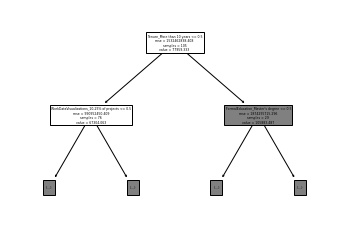

In [12]:
#valudation
try:
    tree.plot_tree(reg_fit,max_depth=1,feature_names=x.columns)
    print('Excellent! You know know the basics to fitting a decision tree.')
    print('Now, you can open up the image saved on your local hard drive to view the results')
except:    
    print('Please try again or ask your instructors for help.')

In [39]:
#Visualize the data

dot_data = tree.export_graphviz(reg_fit,out_file=None,
                                    feature_names=x.columns,
                                    class_names=False,impurity=False)
dot_data = dot_data.replace(" <= 0.5","")
dot_data = dot_data.replace('labeldistance=2.5, labelangle=45, headlabel="True"','labeldistance=2.5, labelangle=45, headlabel="False"')
dot_data = dot_data.replace('labeldistance=2.5, labelangle=-45, headlabel="False"','labeldistance=2.5, labelangle=-45, headlabel="True"')

try:
    import graphviz
    graph = graphviz.Source(dot_data)
    graph.render("TreeGraph_CAN",view=True)
    print('Please open up imageCAN and review the results')
except:
    print('Please open up TreeGraph_CAN using a text editor, and paste the code here: https://dreampuf.github.io/GraphvizOnline/')


Please open up imageCAN and review the results


<font color=red> **Lastly, please submit your code along with the tree regression figure along with a brief description to interpret the results by next class.** </font>